
# Exploring Acurite 06045M collected decodes.

Data collected from WHB during the Summer of 2018.

The data was extracted from the logfiles with the following quick and dirty command line to distill just the state changes.  

@todo - should just do this from the logs in Python/Pandas

```
$ (gzip -dc out-whb-rpi-20180*gz ; cat out-whb-rpi-20180*txt ) | \
    egrep Light | uniq | \
    perl -ne 'if (/strike_count. : (\d+).*storm_dist. : (\d+).*ussb1. : (\d+)/ && ($sc != $1 || $sd != $2 || $us != $3) ) { chomp(); print "$_,\n"; $sc = $1; $sd = $2; $us = $3};' ; \
    > foo.json
```    

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [116]:
# read in *lines* of JSON from log file, need lines=True for
# each line being a separate record.
df = pd.read_json("whb-lightning-20180423-20180818.json", 
                  orient="records",
                  lines=True,
                  convert_dates=True,
                  convert_axes=True,

                 )

In [ ]:
# @todo - filter records with no state change here
# (instead of in an external script)

In [117]:
# convert timestampe, to pd.datetime
df['time'] = pd.to_datetime(df['time'])

# Add a time delta between changes
df['timedelta'] = df['time'].diff()




## Quick and dirty stats for each column

Note: min and max for strike_count and store_dist

In [63]:
# auick and dirty stats for each column
df[["strike_count", "storm_dist", "temperature_F", "humidity"]].describe()

,strike_count,storm_dist,temperature_F,humidity
count,622.000000,622.000000,622.000000,622.000000
mean,69.819936,8.845659,75.891318,67.372990
std,34.513267,6.050936,6.430913,5.399867
min,0.000000,0.000000,-28.900000,0.000000
25%,43.000000,5.000000,71.800000,66.000000
50%,72.000000,7.000000,77.000000,67.000000
75%,99.000000,12.000000,79.100000,71.000000
max,127.000000,31.000000,83.800000,77.000000





## Storm distance values

Currently decoded as a 5 bit field 0 - 31 (0x1f)

In [59]:
tmp = df['storm_dist'].unique()
tmp.sort()
print("Storm distance: {0} uniue values: {1}".format(len(tmp), tmp))

Storm distance: 15 uniue values: [ 0  4  5  7  8 10 12 15 17 20 22 24 27 28 31]


In [64]:
# df[['time','strike_count','storm_dist','ussb1']]

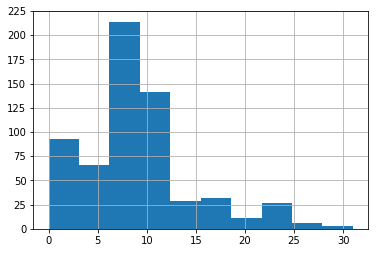

In [90]:
# get a histogram of distance values
df["storm_dist"].hist()




## Events when lightning state changed

In [81]:
# figure out when storms happened 
# (When then was more than 1 day between events)
df[df["timedelta"] > pd.Timedelta(1, unit='D')]["time"]

1     2018-05-10 22:56:01
5     2018-05-15 17:50:55
40    2018-05-24 10:44:02
41    2018-05-27 00:36:24
49    2018-06-02 15:09:08
81    2018-06-22 20:53:34
82    2018-06-24 22:09:17
122   2018-06-28 08:52:37
136   2018-07-06 09:50:07
145   2018-07-09 08:06:36
147   2018-07-11 23:43:55
148   2018-07-17 16:17:02
163   2018-07-27 21:24:47
209   2018-08-04 13:27:05
210   2018-08-07 20:06:07
281   2018-08-11 03:58:44
448   2018-08-14 19:42:41
450   2018-08-18 01:28:31
Name: time, dtype: datetime64[ns]




## look at the events for the first storm

Using the index values from above, can  select out the events from within 1 storm.  Adding one addition row to top and bottom to be able to see what changed to cause an event.


In [85]:
# Columns to print
cols = ['time','timedelta', 'strike_count', 'storm_dist', 'ussb1']
df[cols].iloc[5 - 1:40 + 1]

,time,timedelta,strike_count,storm_dist,ussb1
4,2018-05-10 23:40:25,0 days 00:33:04,51,28,1
5,2018-05-15 17:50:55,4 days 18:10:30,52,8,0
6,2018-05-15 18:00:47,0 days 00:09:52,52,8,1
7,2018-05-15 18:03:58,0 days 00:03:11,53,8,0
8,2018-05-15 18:04:06,0 days 00:00:08,53,8,1
9,2018-05-15 18:04:38,0 days 00:00:32,54,8,0
10,2018-05-15 18:05:26,0 days 00:00:48,54,8,1
11,2018-05-15 18:06:30,0 days 00:01:04,55,8,0
12,2018-05-15 18:06:47,0 days 00:00:17,55,8,1
13,2018-05-15 18:07:19,0 days 00:00:32,56,10,0


In [86]:
# next storm
df[cols].iloc[49 - 1:81 + 1]


,time,timedelta,strike_count,storm_dist,ussb1
48,2018-05-27 12:12:23,0 days 04:45:03,73,12,1
49,2018-06-02 15:09:08,6 days 02:56:45,74,17,0
50,2018-06-02 15:13:00,0 days 00:03:52,74,17,1
51,2018-06-02 15:13:39,0 days 00:00:39,75,8,0
52,2018-06-02 15:14:20,0 days 00:00:41,75,8,1
53,2018-06-02 15:14:28,0 days 00:00:08,76,8,0
54,2018-06-02 15:15:32,0 days 00:01:04,76,8,1
55,2018-06-02 15:16:28,0 days 00:00:56,77,8,0
56,2018-06-02 15:16:43,0 days 00:00:15,77,8,1
57,2018-06-02 15:17:08,0 days 00:00:25,78,8,0


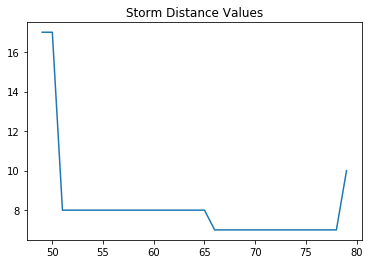

In [122]:
df[cols].iloc[49:80]["storm_dist"].plot(title="Storm Distance Values");


In [87]:
# Next storm
df[cols].iloc[82 - 1:122 + 1]

,time,timedelta,strike_count,storm_dist,ussb1
81,2018-06-22 20:53:34,20 days 04:57:06,91,31,1
82,2018-06-24 22:09:17,2 days 01:15:43,92,22,0
83,2018-06-24 22:28:04,0 days 00:18:47,92,12,1
84,2018-06-24 22:28:28,0 days 00:00:24,93,12,0
85,2018-06-24 22:29:00,0 days 00:00:32,93,12,1
86,2018-06-24 22:29:24,0 days 00:00:24,94,12,0
87,2018-06-24 22:29:49,0 days 00:00:25,94,10,1
88,2018-06-24 22:30:12,0 days 00:00:23,95,10,0
89,2018-06-24 22:31:32,0 days 00:01:20,95,10,1
90,2018-06-24 22:31:57,0 days 00:00:25,96,10,0


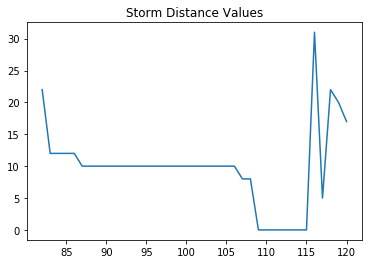

In [123]:
df[cols].iloc[82:122 - 1]["storm_dist"].plot(title="Storm Distance Values");

In [91]:
# skipping to next storm with a lot of events

df[cols].iloc[163 - 1:209 + 1]

,time,timedelta,strike_count,storm_dist,ussb1
162,2018-07-17 18:17:10,0 days 00:24:48,14,12,1
163,2018-07-27 21:24:47,10 days 03:07:37,15,22,0
164,2018-07-27 21:57:27,0 days 00:32:40,15,22,1
165,2018-07-27 21:59:19,0 days 00:01:52,16,12,0
166,2018-07-27 22:00:23,0 days 00:01:04,16,12,1
167,2018-07-27 22:05:27,0 days 00:05:04,17,12,0
168,2018-07-27 22:05:42,0 days 00:00:15,17,12,1
169,2018-07-27 22:08:07,0 days 00:02:25,18,12,0
170,2018-07-27 22:09:27,0 days 00:01:20,18,12,1
171,2018-07-27 22:14:15,0 days 00:04:48,19,12,0


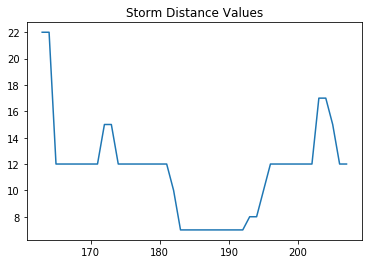

In [124]:
df[cols].iloc[163:209 - 1]["storm_dist"].plot(title="Storm Distance Values")

In [100]:
# skipping to next storm with a lot of events

df[cols].iloc[210 - 1:281 + 1]

,time,timedelta,strike_count,storm_dist,ussb1
209,2018-08-04 13:27:05,7 days 13:47:23,38,22,1
210,2018-08-07 20:06:07,3 days 06:39:02,39,20,0
211,2018-08-07 20:26:54,0 days 00:20:47,39,24,1
212,2018-08-07 20:29:11,0 days 00:02:17,40,24,0
213,2018-08-07 20:33:02,0 days 00:03:51,40,12,1
214,2018-08-07 20:34:23,0 days 00:01:21,41,12,0
215,2018-08-07 20:35:35,0 days 00:01:12,41,12,1
216,2018-08-07 20:36:15,0 days 00:00:40,42,12,0
217,2018-08-07 20:37:03,0 days 00:00:48,43,7,0
218,2018-08-07 20:37:27,0 days 00:00:24,43,7,1


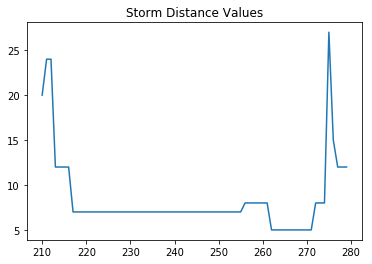

In [126]:
df[cols].iloc[210:281 - 1]["storm_dist"].plot(title="Storm Distance Values")

In [120]:
# skipping to next storm with a lot of events

df[cols].iloc[450 - 1:]

,time,timedelta,strike_count,storm_dist,ussb1
449,2018-08-14 19:54:33,0 days 00:11:52,38,8,1
450,2018-08-18 01:28:31,3 days 05:33:58,39,15,0
451,2018-08-18 01:32:07,0 days 00:03:36,39,15,1
452,2018-08-18 01:38:55,0 days 00:06:48,40,15,0
453,2018-08-18 01:40:23,0 days 00:01:28,40,15,1
454,2018-08-18 01:41:51,0 days 00:01:28,41,15,0
455,2018-08-18 01:45:19,0 days 00:03:28,41,12,1
456,2018-08-18 01:46:15,0 days 00:00:56,42,12,0
457,2018-08-18 01:47:51,0 days 00:01:36,42,12,1
458,2018-08-18 01:48:39,0 days 00:00:48,43,12,0


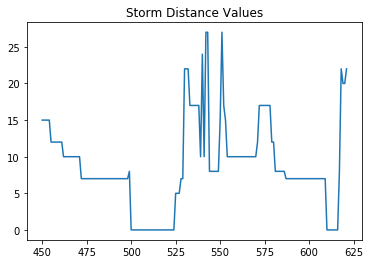

In [121]:
df[cols].iloc[450:]["storm_dist"].plot(title="Storm Distance Values")




## Theory: USSB1 indicates whether strike distance is valid

ussb1 seems to go to zero when strike count is increased. Then typically ussb1 turns to 1 again in a later message.

Storm distance is 0x1f (31) at power up, which is presumably ignored by the console.  So either 0x1f is invalid or some of the other bits are used to determine when to look at the distance.



In [105]:
# check whether ussb1 is set at power up
# was expecting it to be zero.
tmp = df[["storm_dist", "ussb1"]]

tmp[tmp["storm_dist"] == 31]

,storm_dist,ussb1
81,31,1
116,31,1


In [108]:
# check if we have any messages where exception isn't zero
df[df["exception"] != 0]

,active,battery,channel,exception,humidity,id,model,raw_msg,rfi,storm_dist,strike_count,temperature_F,time,ussb1,timedelta
145,1,OK,A,1,0,6194,Acurite Lightning 6045M,d8327800c9bb3a4080,0,0,58,-28.9,2018-07-09 08:06:36,1,2 days 16:37:02



The above looks like a possibly corrupt message that managed to pass the checksum test. The temperature of -28 and the ID value looks wrong.

(Or there is a bug in check in the MIC.  @todo - Check parity)

In [112]:
df["id"].unique()

array([ 213, 6194], dtype=int64)

In [119]:
# how many messages had the other ID.
df[df["id"] == 6194]

,active,battery,channel,exception,humidity,id,model,raw_msg,rfi,storm_dist,strike_count,temperature_F,time,ussb1,timedelta
145,1,OK,A,1,0,6194,Acurite Lightning 6045M,d8327800c9bb3a4080,0,0,58,-28.9,2018-07-09 08:06:36,1,2 days 16:37:02
